In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import os
import time
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.dates import YearLocator, MonthLocator
plt.rcParams["figure.figsize"] = (12, 8) # (width, height)

In [59]:
strategy = os.getcwd()
print("change working directory to parent")
os.chdir('/mnt/c/workspace/project_quant')
print(os.getcwd())

change working directory to parent
/mnt/c/workspace/project_quant


In [60]:
from utils.index_data import index_data
from utils.index_data import index_data

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [62]:
def pca_embeddings(df_scaled):
    """To reduce the dimensions of the wine dataset we use Principal Component Analysis (PCA).
    Here we reduce it from 13 dimensions to 2.
    :param df_scaled: scaled data
    :return: pca result, pca for plotting graph
    """

    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))
    return pca_2_result, pca_2


In [63]:
def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

In [64]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s= 200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

In [69]:
def main():
    
    data_setting = {
    'start' : '1992-01-01',
    'end'   : '2021-06-30',
    'rebal_period':'1M'
    }

    data = index_data(**data_setting)
    data_scaled = data.index_data_loading()

    print("1. Reducing via PCA")
    pca_result, pca_2 = pca_embeddings(data_scaled)
    
    
    df_w = pd.DataFrame(pca_result)
    df_w.index = data_scaled.index
    df_w.columns = ["PCA1","PCA2"]
    print(df_w)
    
#     print(pca_result)

    print("2. HyperTuning the Parameter for KMeans")
    optimum_num_clusters = kmean_hyper_param_tuning(data_scaled)
    print("optimum num of clusters =", optimum_num_clusters)

    # fitting KMeans
    kmeans = KMeans(n_clusters=optimum_num_clusters)
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)

    print("3. Visualizing the data")
    visualizing_results(pca_result, kmeans.labels_, centroids_pca)


1. Reducing via PCA
Explained variation per principal component: [0.67437649 0.14151538]
Cumulative variance explained by 2 principal components: 81.59%
                PCA1      PCA2
1992-01-31  0.023411  0.012472
1992-02-29 -0.016968  0.019601
1992-03-31  0.041969 -0.012803
1992-04-30  0.029679  0.038291
1992-05-31 -0.035692  0.010046
...              ...       ...
2021-02-28 -0.039829  0.056583
2021-03-31 -0.053773  0.064561
2021-04-30 -0.016129 -0.005981
2021-05-31 -0.082190  0.049060
2021-06-30 -0.041806  0.020401

[354 rows x 2 columns]
2. HyperTuning the Parameter for KMeans
Parameter: {'n_clusters': 2} Score 0.3356641270632793
Parameter: {'n_clusters': 3} Score 0.24682104933147728
Parameter: {'n_clusters': 4} Score 0.24615001878708548
Parameter: {'n_clusters': 5} Score 0.18235541643185094
Parameter: {'n_clusters': 10} Score 0.15960802289515863
Parameter: {'n_clusters': 15} Score 0.14557923871550138
Parameter: {'n_clusters': 20} Score 0.14501033078491773
Parameter: {'n_clusters'

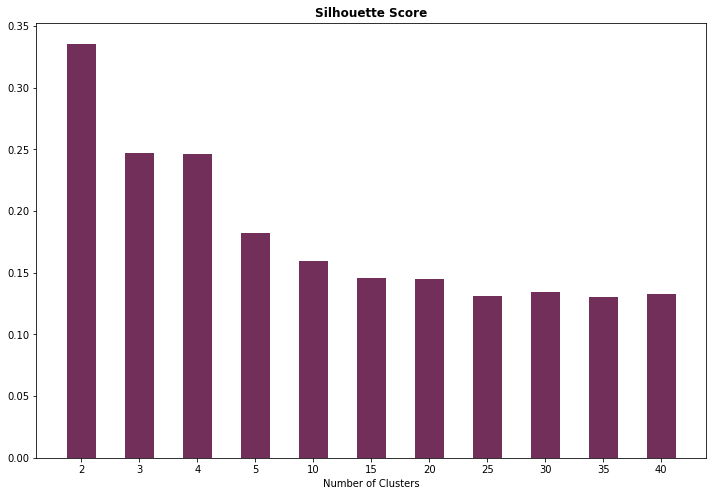

optimum num of clusters = 2
3. Visualizing the data


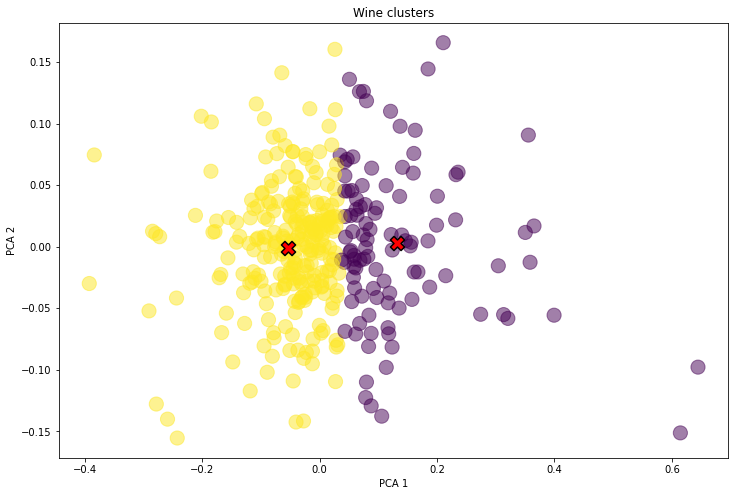

In [70]:
main()

https://datascienceschool.net/02%20mathematics/03.05%20PCA.html

In [48]:
data_setting = {
'start' : '1992-01-01',
'end'   : '2021-06-30',
'rebal_period':'1M'
}

data = index_data(**data_setting)
df = data.index_cum_data_loading()
df = df[['msci_world', 'msci_emerging', 'msci_world_gross','msci_world_value',
'bb_world_agg', 'bb_corp_ig', 'bb_corp_hy']].T

In [49]:
df

,1992-01-31,1992-02-29,1992-03-31,1992-04-30,1992-05-31,1992-06-30,1992-07-31,1992-08-31,1992-09-30,1992-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
msci_world,1.000000,0.979322,0.962324,0.898778,0.923565,0.958458,0.935165,0.925919,0.946223,0.932120,...,4.608581,4.445644,4.337530,4.873375,5.024731,5.039375,5.199679,5.305197,5.507827,5.570121
msci_emerging,1.000000,1.103012,1.163400,1.198026,1.186704,1.186634,1.069737,1.056198,1.019114,1.021849,...,3.878186,3.756337,3.859972,4.238227,4.472819,4.712916,4.717694,4.623407,4.636046,4.815963
msci_world_gross,0.968536,0.945533,0.899575,0.889040,0.926601,0.891546,0.898809,0.930289,0.920312,0.898921,...,5.974730,5.750048,5.543643,6.158531,6.397756,6.460124,6.507391,6.500032,6.788088,6.783666
msci_world_value,0.990900,0.976859,0.928497,0.961648,0.993760,0.960478,0.954368,0.964119,0.953588,0.920567,...,3.323973,3.215419,3.181097,3.620125,3.705148,3.690848,3.898726,4.057982,4.190198,4.284581
bb_world_agg,0.997829,0.984762,0.987790,0.991594,0.998068,1.010517,1.028941,1.048780,1.061627,1.076785,...,4.744209,4.734309,4.715387,4.740902,4.761737,4.732557,4.653979,4.619002,4.642625,4.648800
bb_corp_ig,0.997412,0.985340,0.991802,0.997377,1.001546,1.016692,1.037883,1.063868,1.074932,1.091555,...,6.040019,6.008772,6.000955,6.135291,6.172184,6.108264,5.981918,5.934048,5.970003,5.996821
bb_corp_hy,1.035225,1.060768,1.073920,1.077999,1.093210,1.103503,1.120163,1.134840,1.146392,1.130228,...,8.467538,8.387214,8.434219,8.765545,8.912584,8.949182,8.998323,9.004689,9.096146,9.120544


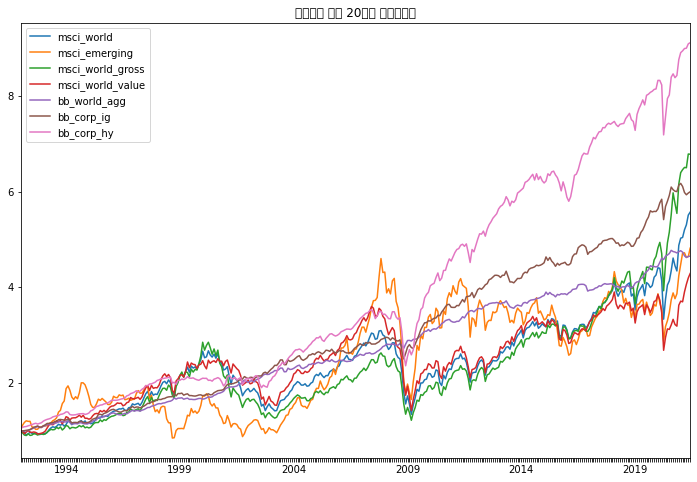

In [50]:
df.T.plot()
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [51]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)
m = pca2.mean_
p1 = pca2.components_[0]

In [52]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

                     주성분 비중
msci_world        -8.968213
msci_emerging     -7.413045
msci_world_gross  -7.958914
msci_world_value -11.203185
bb_world_agg      -1.736521
bb_corp_ig         7.386601
bb_corp_hy        29.893277


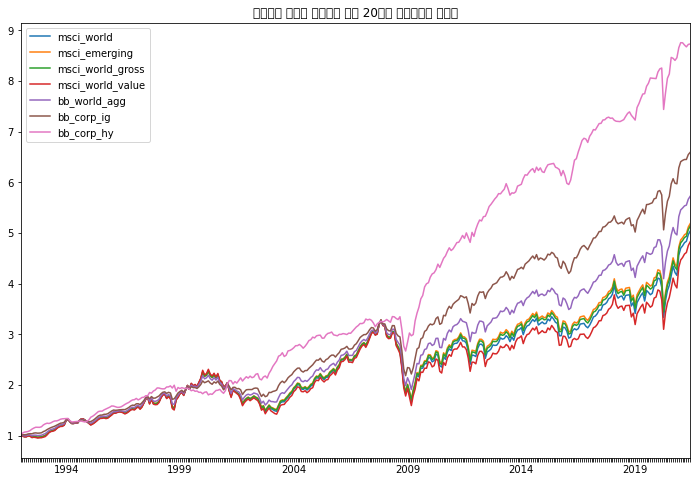

In [53]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
# df_i.T.plot(style=styles)
df_i.T.plot()
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()